<a href="https://colab.research.google.com/github/Zeljko12980/AI-model-for-Brain-Tumor-Detection/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
# Putanje do foldera sa slikama
yes_path = '/content/brain_tumor_dataset/yes'
no_path = '/content/brain_tumor_dataset/no'

data = []
labels = []

# Čitanje slika sa tumorom
for img in os.listdir(yes_path):
    img_path = os.path.join(yes_path, img)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    data.append(img)
    labels.append(1)

# Čitanje slika bez tumora
for img in os.listdir(no_path):
    img_path = os.path.join(no_path, img)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    data.append(img)
    labels.append(0)

# Konverzija u numpy niz i normalizacija
data = np.array(data) / 255.0
labels = np.array(labels)

# Podela na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# One-hot encoding
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # za binary classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5163 - loss: 1.1888 - val_accuracy: 0.5864 - val_loss: 1.0393
Epoch 2/50
19/65 ━━━━━━━━━━━━━━━━━━━━ 1:19 2s/step - accuracy: 0.5317 - loss: 1.0960

KeyboardInterrupt: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.9373 - loss: 0.5792

Test Accuracy: 92.16%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.96      0.89      0.92        27

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51



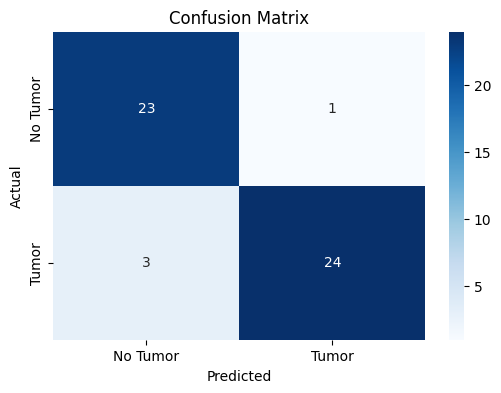

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Predikcije
y_pred = model.predict(X_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Izveštaj
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Konfuziona matrica
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return "Tumor" if class_index == 1 else "No Tumor"

# Primer:
print(predict_image("/content/brain_tumor_dataset/glioma/gg (220).jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Tumor


In [25]:
# Sačuvaj model
model.save("najtacniji.h5")

# Učitaj model (kasnije)
# model = load_model("tumor_detection_model.h5")

In [37]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = []
labels = []
categories = ['glioma', 'meningioma', 'pituitary', 'no']
label_map = {cat: idx for idx, cat in enumerate(categories)}  # npr. {'glioma': 0, ...}

for category in categories:
    folder = os.path.join("/content/brain_tumor_dataset", category)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            data.append(img)
            labels.append(label_map[category])

data = np.array(data) / 255.0
labels = to_categorical(np.array(labels), num_classes=4)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # <--- 4 klase
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test, y_test))


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.5182 - loss: 1.0998 - val_accuracy: 0.6194 - val_loss: 1.1392
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.5380 - loss: 1.0982 - val_accuracy: 0.4951 - val_loss: 1.6588
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5241 - loss: 1.0854 - val_accuracy: 0.6777 - val_loss: 0.9468
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.5299 - loss: 1.0482 - val_accuracy: 0.5262 - val_loss: 1.2429
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.5658 - loss: 1.0164 - val_accuracy: 0.6951 - val_loss: 1.0408
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.5677 - loss: 1.0039 - val_accuracy: 0.6971 - val_loss: 0.8748
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.5710 - loss: 0.9985 - val_accuracy: 0.6796 - val_loss: 0.8842
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5722 - loss: 0.9712 - val_accuracy: 0.5883 - v

In [1]:
y_pred = model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test_labels, y_pred_labels, target_names=categories))

conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'model' is not defined

In [90]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return categories[class_index]

print(predict_image("/content/brain_tumor_dataset/no/no 99.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
no


In [74]:
# Sačuvaj model
model.save("modelclassification1.h5")

# Učitaj model (kasnije)
# model = load_model("tumor_detection_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3331 - loss: 6.4140

65/65 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.3323 - loss: 6.3649 - val_accuracy: 0.3204 - val_loss: 12.0479
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1828 - loss: 1.4574

65/65 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.1842 - loss: 1.4572 - val_accuracy: 0.3320 - val_loss: 11.9628
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3745 - loss: 1.3182

65/65 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.3745 - loss: 1.3192 - val_accuracy: 0.3223 - val_loss: 9.6964
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3525 - loss: 1.3796

65/65 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.3527 - loss: 1.3789 - val_accuracy: 0.3340 - val_loss: 2.8085
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4381 - loss: 1.2626

65/65 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.4377 - loss: 1.2636 - val_accuracy: 0.2757 - val_loss: 1.6764
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.3747 - loss: 1.3044 - val_accuracy: 0.2660 - val_loss: 1.9148
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4159 - loss: 1.3027

65/65 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4160 - loss: 1.3032 - val_accuracy: 0.4854 - val_loss: 1.1915
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4545 - loss: 1.1853

65/65 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.4542 - loss: 1.1862 - val_accuracy: 0.5456 - val_loss: 1.1830
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4401 - loss: 1.2618

65/65 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.4404 - loss: 1.2613 - val_accuracy: 0.5631 - val_loss: 1.1180
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.4628 - loss: 1.1707 - val_accuracy: 0.5825 - val_loss: 1.1353
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.4496 - loss: 1.1812 - val_accuracy: 0.5282 - val_loss: 1.2970
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4781 - loss: 1.1519 - val_accuracy: 0.5864 - val_loss: 1.1656
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4668 - loss: 1.2353

65/65 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.4668 - loss: 1.2344 - val_accuracy: 0.5748 - val_loss: 1.0741
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.4747 - loss: 1.1840 - val_accuracy: 0.5903 - val_loss: 1.1588
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4860 - loss: 1.1410

65/65 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.4861 - loss: 1.1410 - val_accuracy: 0.6175 - val_loss: 1.0638
Epoch 16/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5059 - loss: 1.2072 - val_accuracy: 0.4913 - val_loss: 1.3016
Epoch 17/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.4727 - loss: 1.1872 - val_accuracy: 0.3126 - val_loss: 3.1854
Epoch 18/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4964 - loss: 1.0593 - val_accuracy: 0.5534 - val_loss: 1.1319
Epoch 19/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4385 - loss: 1.1737 - val_accuracy: 0.4097 - val_loss: 1.4254
Epoch 20/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.4783 - loss: 1.1418 - val_accuracy: 0.5689 - val_loss: 1.1293


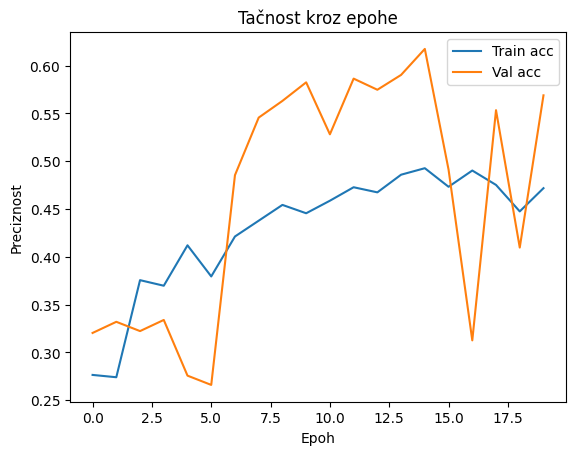

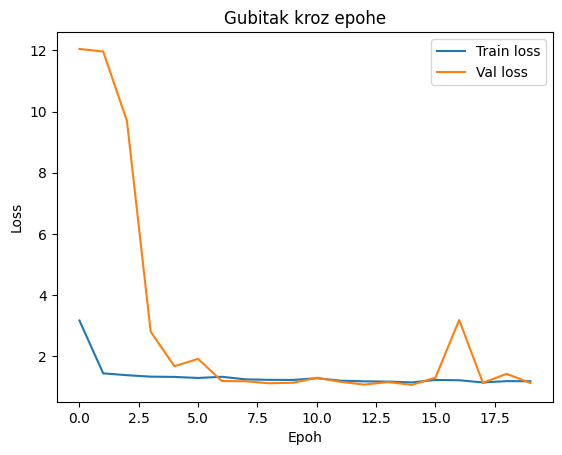

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step

Classification Report:

              precision    recall  f1-score   support

      glioma       0.52      0.88      0.66       165
  meningioma       0.58      0.04      0.08       164
   pituitary       0.77      0.92      0.84       166
          no       0.46      0.60      0.52        20

    accuracy                           0.62       515
   macro avg       0.59      0.61      0.52       515
weighted avg       0.62      0.62      0.53       515



In [91]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# ------------------------------
# 1. Učitavanje i priprema podataka
# ------------------------------
data = []
labels = []
categories = ['glioma', 'meningioma', 'pituitary', 'no']
label_map = {cat: idx for idx, cat in enumerate(categories)}

dataset_path = "/content/brain_tumor_dataset"  # promeni ako koristiš lokalno
for category in categories:
    folder = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            data.append(img)
            labels.append(label_map[category])

data = np.array(data) / 255.0
labels = to_categorical(np.array(labels), num_classes=4)

# ------------------------------
# 2. Podela na train/test skupove
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# ------------------------------
# 3. Augmentacija + class weights
# ------------------------------
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

y_train_labels = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_labels),
                                                  y=y_train_labels)
class_weights = dict(enumerate(class_weights))

# ------------------------------
# 4. Model
# ------------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ------------------------------
# 5. Treniranje modela
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights,
                    callbacks=[early_stop, checkpoint])

# ------------------------------
# 6. Evaluacija
# ------------------------------
# Preciznost / tačnost
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Tačnost kroz epohe')
plt.xlabel('Epoh')
plt.ylabel('Preciznost')
plt.legend()
plt.show()

# Gubitak
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Gubitak kroz epohe')
plt.xlabel('Epoh')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ------------------------------
# 7. Izveštaj po klasama
# ------------------------------
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true_labels, y_pred_labels, target_names=categories))
